In [1]:
import coin
import importlib
import pandas as pd
import logging
import numpy as np
import seaborn as sns
import time
import matplotlib.pyplot as plt
import traceback

In [2]:
logging.basicConfig(
    format="[%(levelname)s]%(asctime)s %(message)s", 
    datefmt="%Y-%m-%d %H:%M:%S",
    filename="coin.log",
    level=logging.DEBUG
)

In [20]:
n_sample = int(5e4)
Wobs = 12 * 1000

m_beta, s_beta = 10, 100 # 重さの観測誤差の事前分布の期待値・標準偏差
m_mu, s_mu = 420, 500  # 投入回数の事前分布の期待値・標準偏差
s_beta_, s_mu_ = 1, 1  # 提案分布の標準偏差

T_i = 420         # 投入回数
M_i = [200] * T_i # 各投入の金額
mu_i = 200        # Tの事前分布の平均
beta_i = 1        # 重さの観測の標準偏差

In [21]:
importlib.reload(coin)
try:
    samples, lls, proposed = coin.run(
        n_sample,
        Wobs,
        [m_beta, s_beta, m_mu, s_mu, s_beta_, s_mu_],
        coin.Coin2.Param(T_i, M_i, mu_i, beta_i),
        coin.Coin2,
        seed = 3        
    )
except coin.McmcException as e:
    samples, lls, proposed = e.ret
    traceback.print_exec()

1000-th step begins: 21.663244009017944


KeyboardInterrupt: 

In [18]:
df = pd.DataFrame(dict(
    Ts = [p.T for p in samples],
    mus = [p.mu for p in samples],
    betas = [p.beta for p in samples],
    lls = lls
))
df.tail(1)

,Ts,mus,betas,lls
19999,417,365.291351,16.935136,-2902.595241


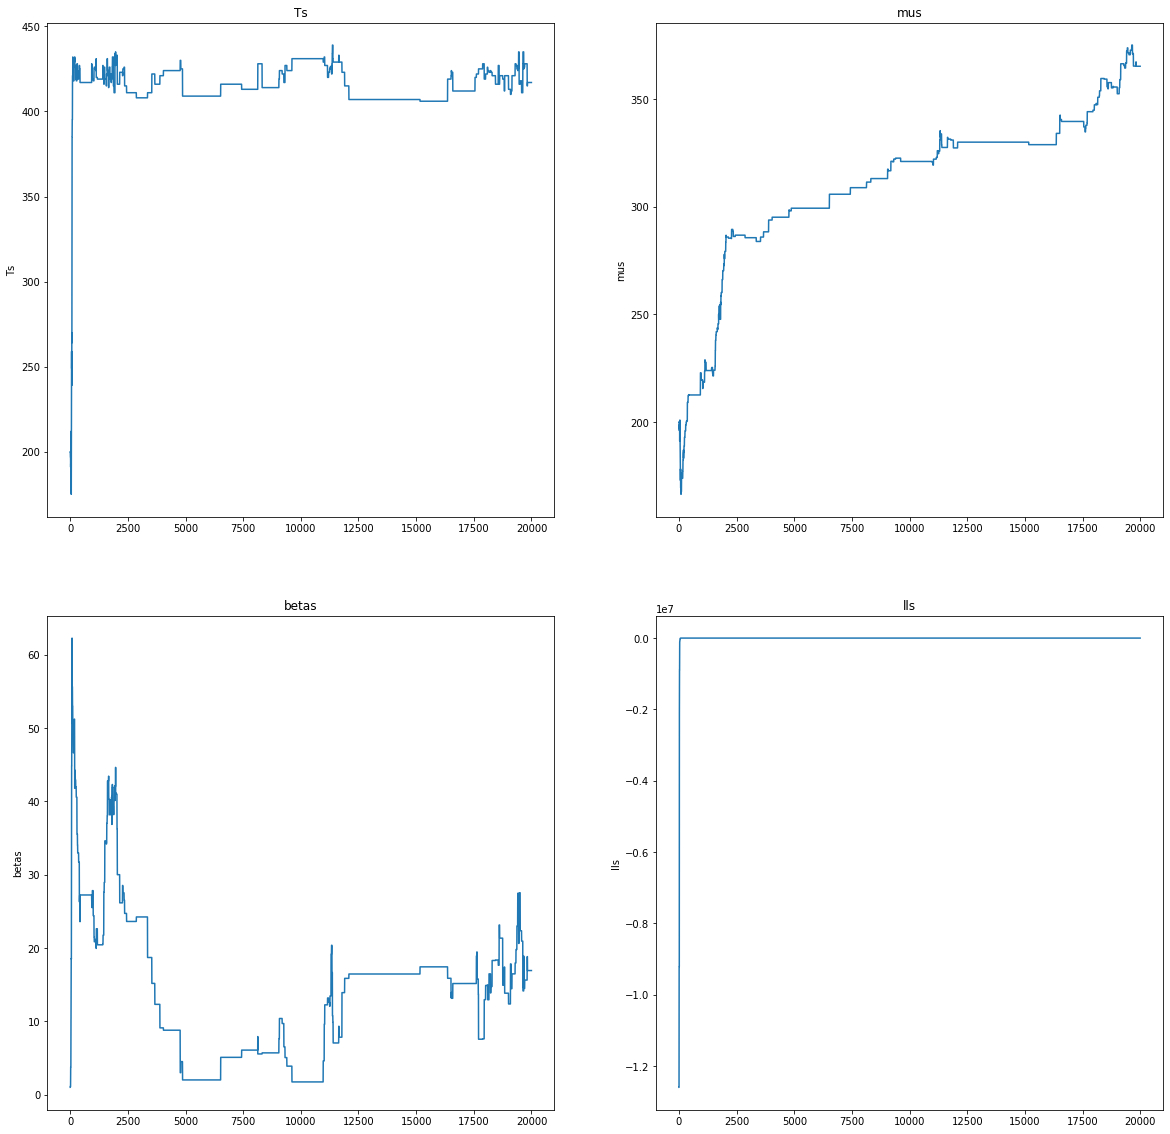

In [19]:
fig = plt.figure(figsize=(20,20))
for i, c in enumerate(df.columns):
    ax = fig.add_subplot(2, 2, i+1)
    sns.lineplot(range(len(df)), df[c])
    ax.set_title(c)